# 5 输出部分

- 结构

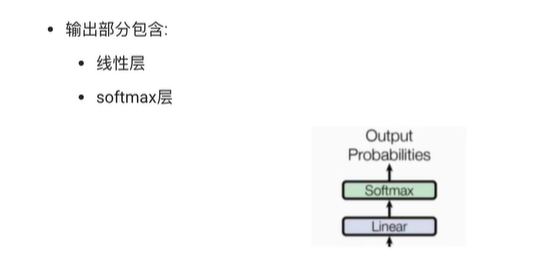

- 线性层：转换维度
- softmax：最后一维的向量，数字缩放到0-1，且满足和为1.

- 线性层和softmax层的代码实现

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Generator(nn.Module):
    def __init__(self, d_model, vocab_size):
        '''参数：
        d_model: 词嵌入维度
        vocab_size: 词表大小'''
        super(Generator, self).__init__()
        # 初始化一个线性层，因为线性层初始化不需要x
        self.project = nn.Linear(d_model, vocab_size)
    
    def forward(self, x):
        # x: [batch_size, seq_len, d_model]
        # 先做一个线性变换，目的是将d_model维度的输出转换为词表大小的输出
        x = self.project(x)
        # x: [batch_size, seq_len, vocab_size]
        # 投射到的新张量x，是一个比原本x大得多的、被称作对数几率（logits）的张量。
        # vocab_size是输出词表的大小，假设是10000。因此对数几率向量为一万个单元格长度的向量
        # 每个单元格对应某一个单词的分数。


        # 然后再做一个log_softmax，下来的Softmax 层便会把那些分数变成概率（都为正数、上限1.0）。
        # 概率最高的单元格被选中，并且它对应的单词被作为这个时间步的输出。
        # 使用log_softmax是因为这样可以使得模型更加稳定，同时也方便计算交叉熵损失
        x = F.log_softmax(x, dim=-1)
        # x: [batch_size, seq_len, vocab_size]
        return x


- nn.Linear演示

In [3]:
import torch
import torch.nn as nn

# Create a random 2-dimensional input tensor
input_tensor = torch.randn(5, 2)

# Create a linear layer with input size 2 and output size 3
linear_layer = nn.Linear(2, 3)

# Pass the input tensor through the linear layer
output_tensor = linear_layer(input_tensor)

# Print the output tensor
print("input",input_tensor)
print(output_tensor)


input tensor([[-0.7295,  0.6940],
        [ 1.0258, -0.4114],
        [ 1.1825, -0.1509],
        [-0.1543,  0.4668],
        [-0.0903,  0.1350]])
tensor([[ 1.1575, -0.2721, -0.4259],
        [ 0.1557, -1.0178, -0.6778],
        [ 0.2384, -1.0876, -0.9302],
        [ 0.8939, -0.5177, -0.5949],
        [ 0.7177, -0.5422, -0.4175]], grad_fn=<AddmmBackward0>)
